In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

df = pd.read_csv('./data/dataset.csv')

# Make sure we loaded in the dataset.
df.head()

,_bkt,_cd,_eventtype_color,_indextime,_raw,_sourcetype,_time,action,additionalEventData.LoginTo,additionalEventData.MFAUsed,...,user_agent,user_arn,user_group_id,user_id,user_role,user_type,vendor,vendor_account,vendor_region,vpcEndpointId
0,botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E,307:1010563,NaN,1534777232,"{""requestParameters"": {""filterSet"": {""items"": ...",aws:cloudtrail,1534776810,NaN,NaN,NaN,...,Boto/2.47.0 Python/2.7.14 Linux/4.4.0-1062-aws,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-west-1,NaN
1,botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E,307:1010534,NaN,1534777232,"{""requestParameters"": {""filterSet"": {""items"": ...",aws:cloudtrail,1534776809,NaN,NaN,NaN,...,Boto/2.47.0 Python/2.7.14 Linux/4.4.0-1062-aws,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-west-1,NaN
2,botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E,307:1010505,NaN,1534777232,"{""requestParameters"": {""filterSet"": {""items"": ...",aws:cloudtrail,1534776809,NaN,NaN,NaN,...,Boto/2.47.0 Python/2.7.14 Linux/4.4.0-1062-aws,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-west-1,NaN
3,botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E,307:1010476,NaN,1534777232,"{""requestParameters"": {""filterSet"": {""items"": ...",aws:cloudtrail,1534776809,NaN,NaN,NaN,...,Boto/2.47.0 Python/2.7.14 Linux/4.4.0-1062-aws,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-west-1,NaN
4,botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E,307:1010450,NaN,1534777232,"{""requestParameters"": {""securityGroupIdSet"": {...",aws:cloudtrail,1534776809,NaN,NaN,NaN,...,Boto/2.47.0 Python/2.7.14 Linux/4.4.0-1062-aws,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-west-1,NaN


In [2]:

# Timestamp data is displayed in epoch rather than a human readable time format.
# Let's convert it:

df['_time'] = pd.to_datetime(df['_time'], unit='s')
df['_indextime'] = pd.to_datetime(df['_indextime'], unit='s')
df = df.sort_values('_time')

# And check our conversion worked:
df.head()

,_bkt,_cd,_eventtype_color,_indextime,_raw,_sourcetype,_time,action,additionalEventData.LoginTo,additionalEventData.MFAUsed,...,user_agent,user_arn,user_group_id,user_id,user_role,user_type,vendor,vendor_account,vendor_region,vpcEndpointId
4577,botsv3~303~F1874916-CBDC-4E45-BC0A-518E1190B08E,303:171332,NaN,2018-08-20 09:09:19,"{""sourceIPAddress"": ""34.215.24.225"", ""eventTim...",aws:cloudtrail,2018-08-20 09:01:54,NaN,NaN,NaN,...,Boto3/1.5.22 Python/2.7.14 Linux/4.4.0-1062-aw...,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-east-1,NaN
4575,botsv3~303~F1874916-CBDC-4E45-BC0A-518E1190B08E,303:171388,NaN,2018-08-20 09:09:19,"{""sourceIPAddress"": ""34.215.24.225"", ""eventTim...",aws:cloudtrail,2018-08-20 09:01:54,NaN,NaN,NaN,...,Boto3/1.5.22 Python/2.7.14 Linux/4.4.0-1062-aw...,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-east-1,NaN
4576,botsv3~303~F1874916-CBDC-4E45-BC0A-518E1190B08E,303:171360,NaN,2018-08-20 09:09:19,"{""sourceIPAddress"": ""34.215.24.225"", ""eventTim...",aws:cloudtrail,2018-08-20 09:01:54,NaN,NaN,NaN,...,Boto3/1.5.22 Python/2.7.14 Linux/4.4.0-1062-aw...,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-east-1,NaN
4578,botsv3~303~F1874916-CBDC-4E45-BC0A-518E1190B08E,303:171304,NaN,2018-08-20 09:09:19,"{""sourceIPAddress"": ""34.215.24.225"", ""eventTim...",aws:cloudtrail,2018-08-20 09:01:56,NaN,NaN,NaN,...,Boto3/1.5.22 Python/2.7.14 Linux/4.4.0-1062-aw...,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-east-1,NaN
4574,botsv3~303~F1874916-CBDC-4E45-BC0A-518E1190B08E,303:171416,NaN,2018-08-20 09:09:19,"{""sourceIPAddress"": ""34.215.24.225"", ""eventTim...",aws:cloudtrail,2018-08-20 09:02:00,NaN,NaN,NaN,...,Boto3/1.5.22 Python/2.7.14 Linux/4.4.0-1062-aw...,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-east-1,NaN


In [3]:
# Set up our dataframe. 
# Interested columns: time, sourceIPAddress, errorCode, and regon
df_prime = df[
    [
        '_time',
        'sourceIPAddress',
        'errorCode',
        'region'
    ]
]

df_prime.set_index('_time', inplace=True, drop=True)

df_prime.head()

,sourceIPAddress,errorCode,region
_time,,,
2018-08-20 09:01:54,34.215.24.225,success,us-east-1
2018-08-20 09:01:54,34.215.24.225,success,us-east-1
2018-08-20 09:01:54,34.215.24.225,success,us-east-1
2018-08-20 09:01:56,34.215.24.225,success,us-east-1
2018-08-20 09:02:00,34.215.24.225,success,us-east-1


In [12]:
# Let's look at all the value counts for the region column for our known attacker
df_attacker = df_prime[df_prime['sourceIPAddress'] == '139.198.18.205']

print('IP Address: 139.198.18.205')
df_attacker['region'].value_counts()

IP Address: 139.198.18.205


us-east-1         57
ap-south-1        47
us-west-1         41
ap-northeast-1    41
eu-west-1         41
ap-northeast-2    41
eu-west-3         41
eu-central-1      41
ap-southeast-1    41
ca-central-1      41
us-west-2         41
sa-east-1         41
ap-southeast-2    41
us-east-2         41
eu-west-2         41
Name: region, dtype: int64

In [13]:
# Now let's look at all the value counts for the region column for a known authenticated user
df_normal_1 = df_prime[df_prime['sourceIPAddress'] == '34.215.24.225']

print('IP Address: 34.215.24.225')
df_normal_1['region'].value_counts()

IP Address: 34.215.24.225


us-west-1    2771
us-east-1     726
us-west-2     574
Name: region, dtype: int64

In [14]:
# And another known authenticated user
df_normal_2 = df_prime[df_prime['sourceIPAddress'] == '107.77.212.175']

print('IP Address: 107.77.212.175')
df_normal_2['region'].value_counts()

IP Address: 107.77.212.175


us-west-1    465
us-west-2     60
us-east-1     27
Name: region, dtype: int64

In [19]:
# Just from a quick look at the data above, the attacker makes requests from many regions
# while known authenticated users make requests from the exact exact same regions

# Now that a quick verification has shown that regions could be a beneficial feature in
# identifying an attacker, let's do a more comprehensive analysis.

# Groupby sourceIPAddress and region, and get the count of each then convert to df
df_aggr_region = df_prime.groupby(['sourceIPAddress', 'region']).size().to_frame()

# Rename the column to numOfRequests for clarity
df_aggr_region = df_aggr_region.rename(columns={0: "numOfRequests"})

# Let's check it out
df_aggr_region.head(15)

numOfRequests
sourceIPAddress region                       
107.77.212.175  us-east-1                  27
                us-west-1                 465
                us-west-2                  60
139.198.18.205  ap-northeast-1             41
                ap-northeast-2             41
                ap-south-1                 47
                ap-southeast-1             41
                ap-southeast-2             41
                ca-central-1               41
                eu-central-1               41
                eu-west-1                  41
                eu-west-2                  41
                eu-west-3                  41
                sa-east-1                  41
                us-east-1                  57

In [20]:
# Reindex to make each group it's own seperate row
df_aggr_region_reindx = df_aggr_region.reset_index(level=df_aggr_region.index.names)

# For visualization sake
df_aggr_region_reindx.head(15)

,sourceIPAddress,region,numOfRequests
0,107.77.212.175,us-east-1,27
1,107.77.212.175,us-west-1,465
2,107.77.212.175,us-west-2,60
3,139.198.18.205,ap-northeast-1,41
4,139.198.18.205,ap-northeast-2,41
5,139.198.18.205,ap-south-1,47
6,139.198.18.205,ap-southeast-1,41
7,139.198.18.205,ap-southeast-2,41
8,139.198.18.205,ca-central-1,41
9,139.198.18.205,eu-central-1,41


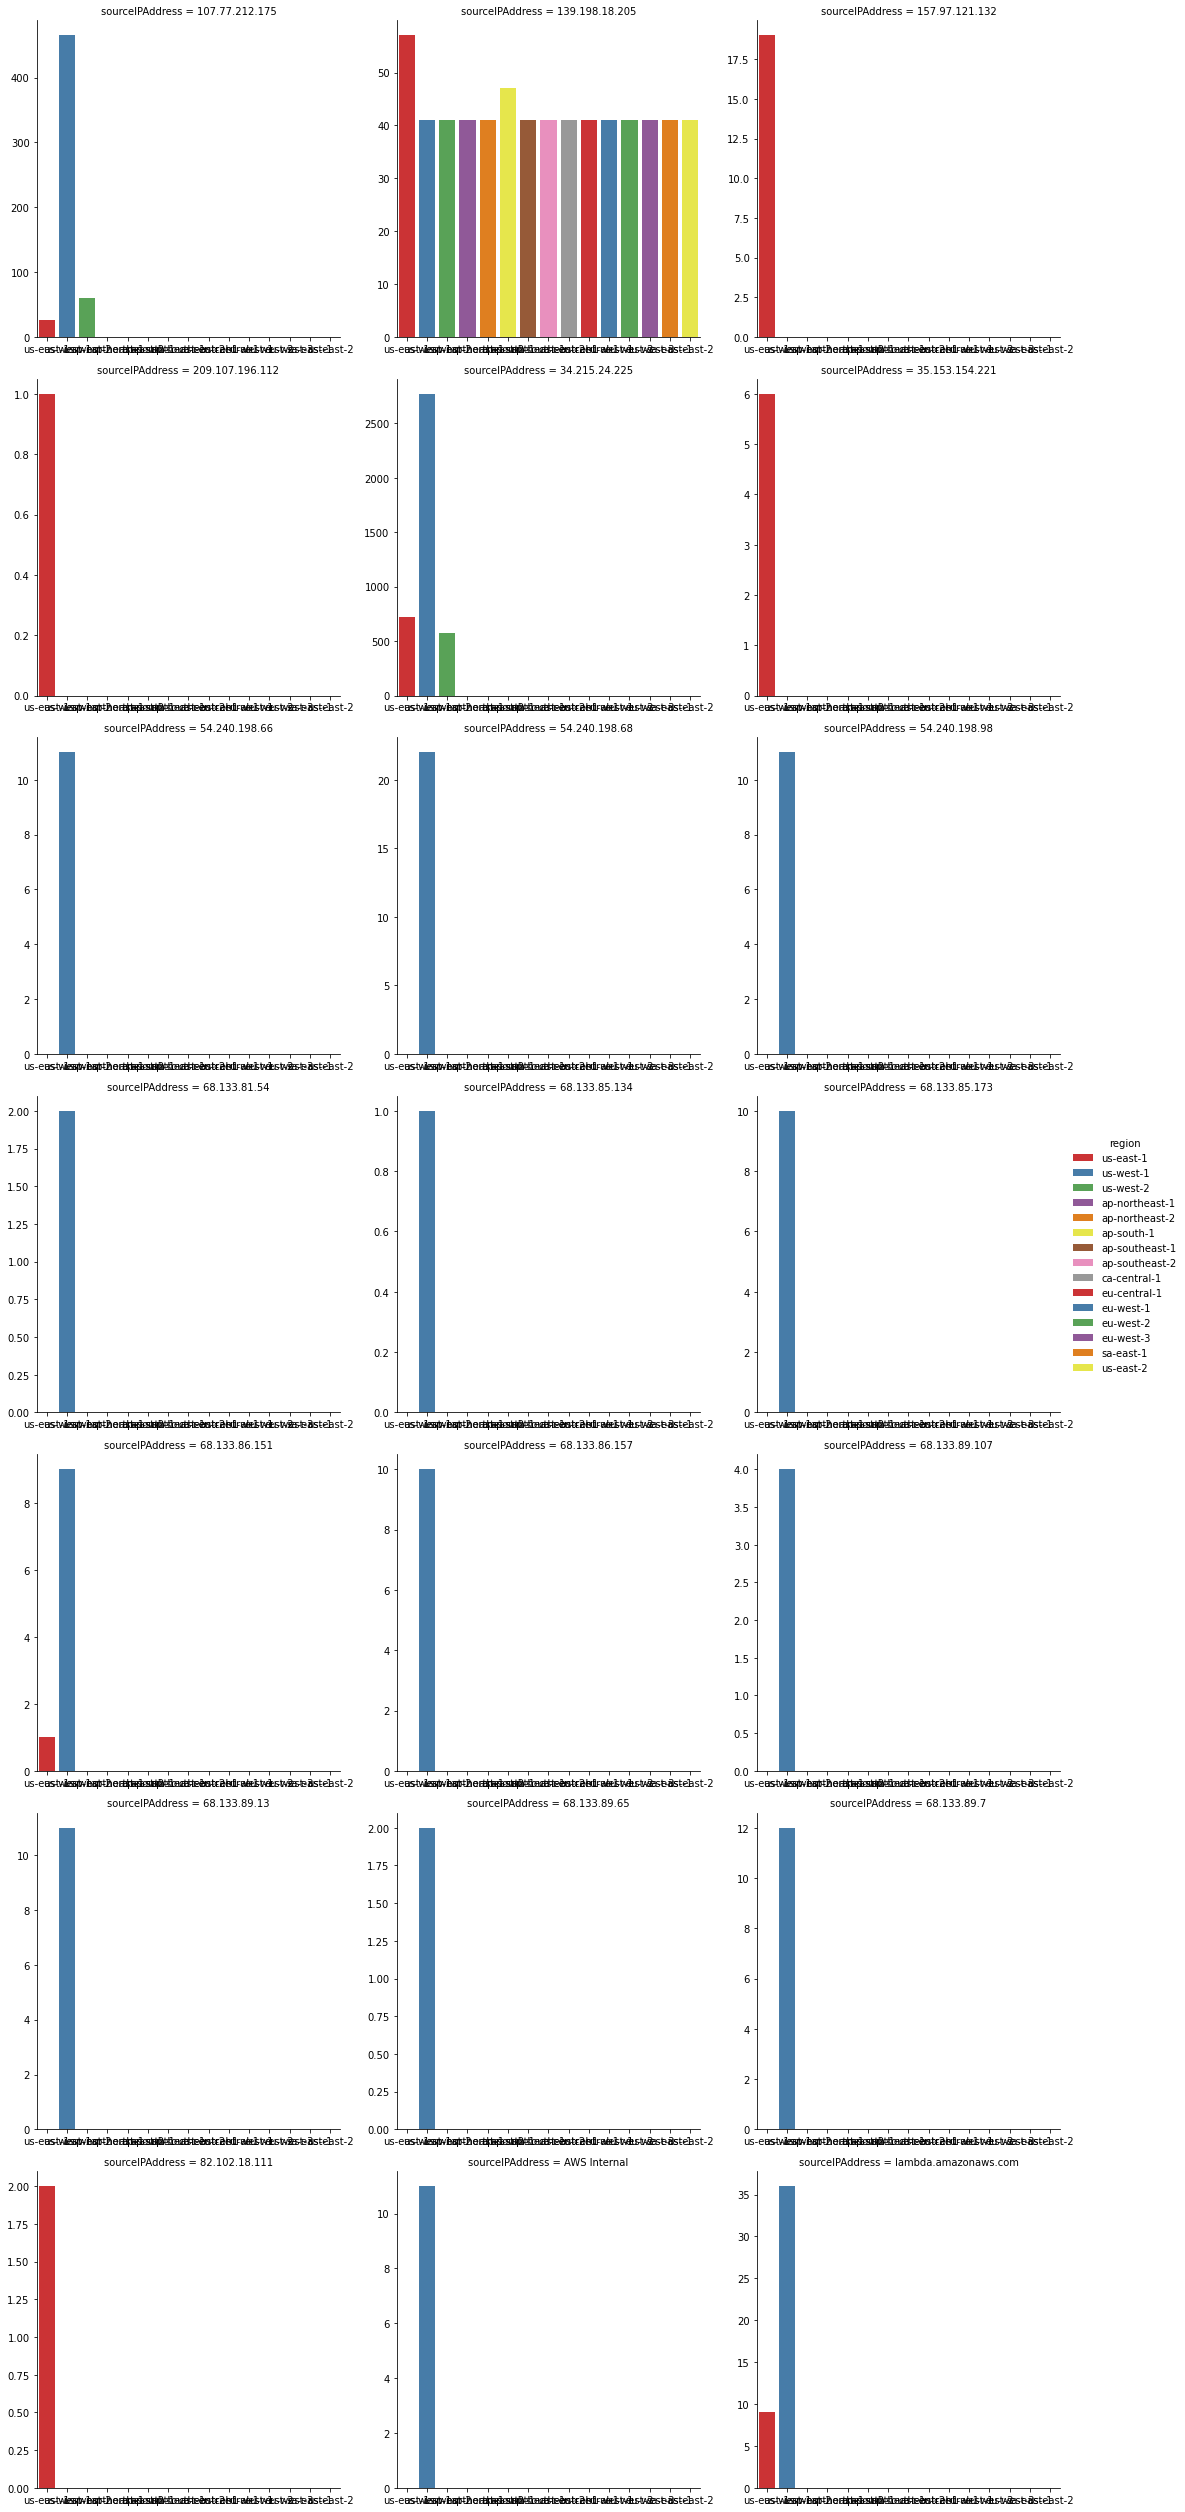

In [41]:
# Get a list of all regions
regions = df_aggr_region_reindx['region'].unique()

# Create a facet plot with the sourceIPAddress as the facet
region_plot = sns.FacetGrid(
        data=df_aggr_region_reindx,
        col='sourceIPAddress',
        hue='region',
        palette='Set1',
        sharex=False,
        sharey=False,
        height=5,
        col_wrap=3
    )

# Plot each as a barplot with x=region, y=numOfRequests
region_plot.map_dataframe(
    sns.barplot,
    x='region',
    y='numOfRequests',
    order=regions
    )

# Add the lengend
region_plot.add_legend()

plt.show()